<a href="https://colab.research.google.com/github/withoutJ/StockPrediction/blob/master/predicting_apple_stocks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# read csv file
data = pd.read_csv('new_^IXIC.csv')
nasdaq_close = data['Close']

nasdaq_close

0       10536.269531
1       10402.089844
2       10542.940430
3       10587.809570
4       10745.269531
            ...     
1085    14244.950195
1086    14353.639648
1087    14358.019531
1088    14063.309570
1089    14032.809570
Name: Close, Length: 1090, dtype: float64

<AxesSubplot:title={'center':'Closing Price'}>

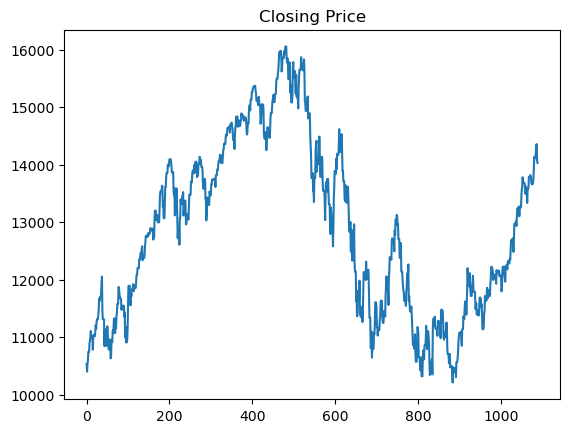

In [3]:
nasdaq_close.plot(title='Closing Price')

In [4]:
trainingLength = math.ceil(len(nasdaq_close)*0.7)

trainingLength

763

In [5]:
nasdaq_reshaped = np.array(nasdaq_close)
nasdaq_reshaped = np.reshape(nasdaq_reshaped, (len(nasdaq_close), 1))

nasdaq_reshaped

array([[10536.269531],
       [10402.089844],
       [10542.94043 ],
       ...,
       [14358.019531],
       [14063.30957 ],
       [14032.80957 ]])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

#scaled_data = scaler.fit_transform(aapl_reshaped)
scaler.fit(nasdaq_reshaped[0:trainingLength, :])
scaled_data = scaler.transform(nasdaq_reshaped)


scaled_data


array([[0.02372615],
       [0.        ],
       [0.02490572],
       ...,
       [0.69950211],
       [0.64739041],
       [0.64199729]])

In [7]:
train_data = scaled_data[0:trainingLength, :]

Xtrain = []
Ytrain = []

for i in range(50, len(train_data)):
  Xtrain.append(train_data[i-50:i, 0])
  Ytrain.append(train_data[i, 0])

In [8]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [9]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain = np.asarray(Xtrain).astype('float32')
Xtrain.shape

(713, 50, 1)

In [10]:
model = models.Sequential()

model.add(layers.Conv1D(16, 3, activation='relu', input_shape=(Xtrain.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())

model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse')

In [12]:
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=50, verbose=2, validation_split=0.2)

Epoch 1/50
12/12 - 0s - loss: 0.0244 - val_loss: 0.0399 - 489ms/epoch - 41ms/step
Epoch 2/50
12/12 - 0s - loss: 0.0110 - val_loss: 0.0227 - 31ms/epoch - 3ms/step
Epoch 3/50
12/12 - 0s - loss: 0.0078 - val_loss: 0.0157 - 31ms/epoch - 3ms/step
Epoch 4/50
12/12 - 0s - loss: 0.0059 - val_loss: 0.0145 - 31ms/epoch - 3ms/step
Epoch 5/50
12/12 - 0s - loss: 0.0047 - val_loss: 0.0117 - 32ms/epoch - 3ms/step
Epoch 6/50
12/12 - 0s - loss: 0.0042 - val_loss: 0.0138 - 33ms/epoch - 3ms/step
Epoch 7/50
12/12 - 0s - loss: 0.0040 - val_loss: 0.0080 - 32ms/epoch - 3ms/step
Epoch 8/50
12/12 - 0s - loss: 0.0035 - val_loss: 0.0075 - 32ms/epoch - 3ms/step
Epoch 9/50
12/12 - 0s - loss: 0.0033 - val_loss: 0.0079 - 31ms/epoch - 3ms/step
Epoch 10/50
12/12 - 0s - loss: 0.0030 - val_loss: 0.0071 - 31ms/epoch - 3ms/step
Epoch 11/50
12/12 - 0s - loss: 0.0028 - val_loss: 0.0067 - 31ms/epoch - 3ms/step
Epoch 12/50
12/12 - 0s - loss: 0.0026 - val_loss: 0.0077 - 31ms/epoch - 3ms/step
Epoch 13/50
12/12 - 0s - loss: 0.00

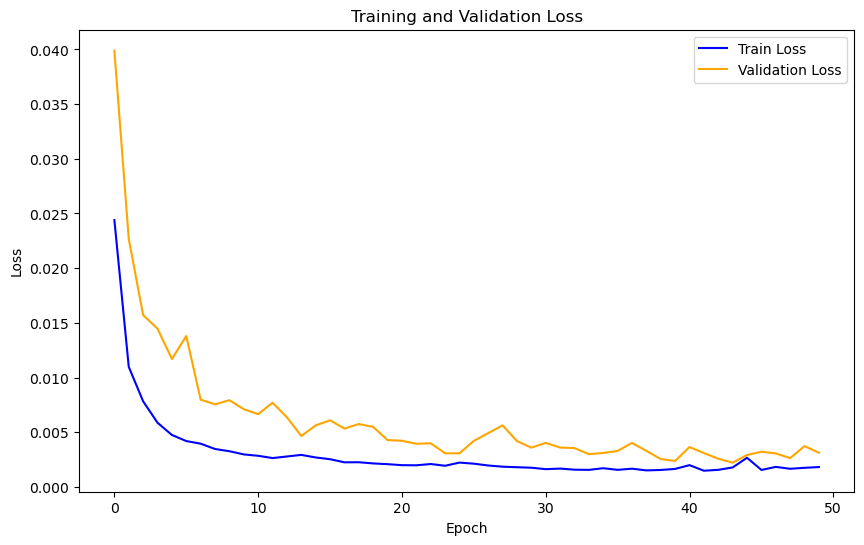

In [13]:
import matplotlib.pyplot as plt

# Get the loss value and verification loss value during training
train_loss = history_data.history['loss']
val_loss = history_data.history['val_loss']

# plot
plt.figure(figsize=(10, 6))

# Plot the training loss curve
plt.plot(train_loss, label='Train Loss', color='blue')
# Plot validation loss curve
plt.plot(val_loss, label='Validation Loss', color='orange')

# add title and label
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()


In [14]:
test_data = scaled_data[trainingLength: , :]


Xtest = []
Ytest = nasdaq_reshaped[trainingLength+50:, :]
for i in range(50, len(test_data)):
  Xtest.append(test_data[i-50:i, 0])


In [15]:
Xtest = np.array(Xtest)

Xtest

array([[ 0.28567284,  0.2618847 ,  0.25004822, ..., -0.01426971,
        -0.01426971,  0.04839841],
       [ 0.2618847 ,  0.25004822,  0.24455425, ..., -0.01426971,
         0.04839841,  0.06547968],
       [ 0.25004822,  0.24455425,  0.21727574, ...,  0.04839841,
         0.06547968,  0.04923124],
       ...,
       [ 0.46245406,  0.44792982,  0.47722782, ...,  0.65630067,
         0.67950878,  0.69872765],
       [ 0.44792982,  0.47722782,  0.50194584, ...,  0.67950878,
         0.69872765,  0.69950211],
       [ 0.47722782,  0.50194584,  0.50194584, ...,  0.69872765,
         0.69950211,  0.64739041]])

In [16]:
Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1], 1))

In [17]:
print(Xtest.shape)

(277, 50, 1)


In [18]:
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

9/9 [==============================] - 0s 741us/step


array([[10826.225 ],
       [11007.962 ],
       [10999.78  ],
       [10783.033 ],
       [10758.974 ],
       [10916.232 ],
       [10987.515 ],
       [10937.365 ],
       [11189.98  ],
       [11155.319 ],
       [11035.706 ],
       [10878.616 ],
       [11231.121 ],
       [11243.731 ],
       [11118.855 ],
       [11090.263 ],
       [10755.401 ],
       [10536.545 ],
       [10304.143 ],
       [10501.563 ],
       [10562.838 ],
       [10506.149 ],
       [10554.812 ],
       [10516.306 ],
       [10752.788 ],
       [11315.745 ],
       [11508.918 ],
       [11471.245 ],
       [11246.468 ],
       [11156.217 ],
       [11128.642 ],
       [10993.259 ],
       [11095.999 ],
       [11095.42  ],
       [11037.191 ],
       [10904.199 ],
       [10793.076 ],
       [11113.246 ],
       [11139.696 ],
       [11275.521 ],
       [11236.276 ],
       [10988.923 ],
       [10871.618 ],
       [10862.317 ],
       [10962.572 ],
       [11383.746 ],
       [11474.608 ],
       [11523

In [19]:
print(predictions.shape)

(277, 1)


In [20]:
print(predictions.shape)

print(Ytest.shape)

(277, 1)
(277, 1)


In [21]:
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

191.04033718055737

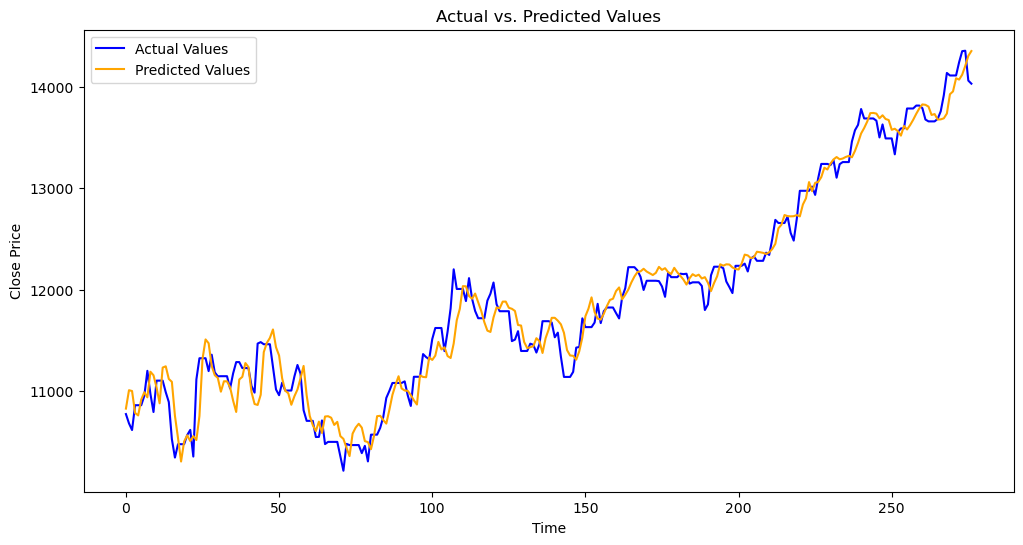

In [22]:
# Draw a comparison graph between predicted values and actual values
plt.figure(figsize=(12, 6))
plt.plot(Ytest, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


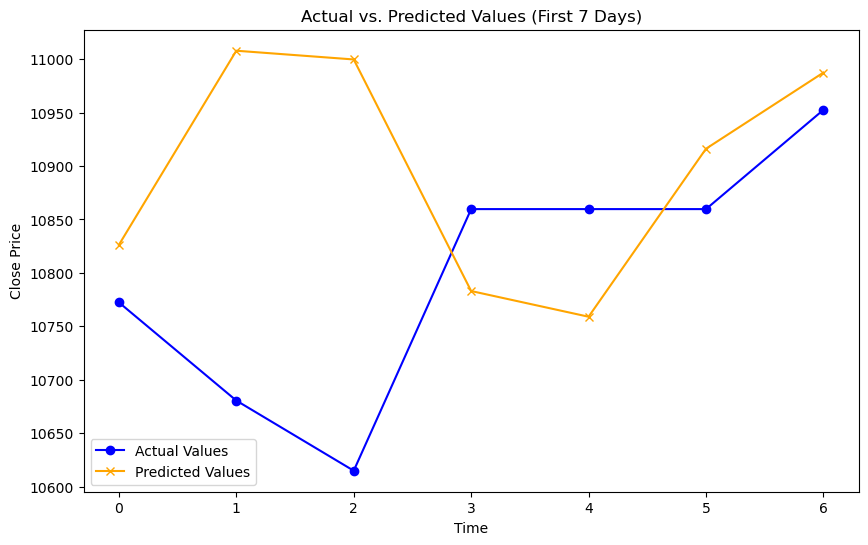

MAE (First 7 Days): 147.86662932142877
MSE (First 7 Days): 39820.52614283598
RMSE (First 7 Days): 199.55081093003852


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions_7days = predictions[:7]
actual_values_7days = Ytest[:7]

# Plot the predicted and actual values (first 7 days)
plt.figure(figsize=(10, 6))
plt.plot(actual_values_7days, label='Actual Values', color='blue', marker='o')
plt.plot(predictions_7days, label='Predicted Values', color='orange', marker='x')
plt.title('Actual vs. Predicted Values (First 7 Days)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate MAE, MSE and RMSE
mae_7days = mean_absolute_error(actual_values_7days, predictions_7days)
mse_7days = mean_squared_error(actual_values_7days, predictions_7days)
rmse_7days = np.sqrt(mse_7days)

print(f"MAE (First 7 Days): {mae_7days}")
print(f"MSE (First 7 Days): {mse_7days}")
print(f"RMSE (First 7 Days): {rmse_7days}")

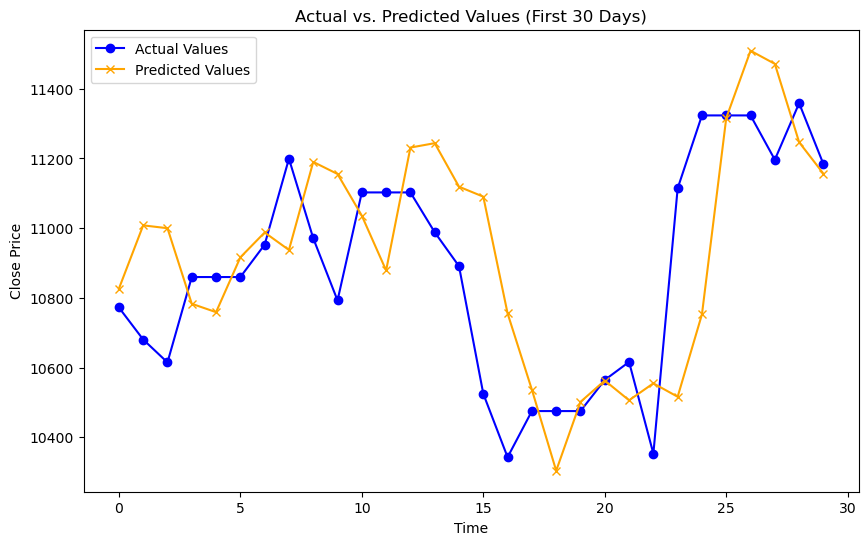

MAE (First 30 Days): 203.57604155833334
MSE (First 30 Days): 69929.48468503247
RMSE (First 30 Days): 264.4418361096301


In [24]:
# Get the predicted and actual values of the first 30 days of the test set
predictions_30days = predictions[:30]
actual_values_30days = Ytest[:30]

# Plot a comparison diagram between predicted values and actual values (first 30 days)
plt.figure(figsize=(10, 6))
plt.plot(actual_values_30days, label='Actual Values', color='blue', marker='o')
plt.plot(predictions_30days, label='Predicted Values', color='orange', marker='x')
plt.title('Actual vs. Predicted Values (First 30 Days)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate MAE, MSE and RMSE
mae_30days = mean_absolute_error(actual_values_30days, predictions_30days)
mse_30days = mean_squared_error(actual_values_30days, predictions_30days)
rmse_30days = np.sqrt(mse_30days)

print(f"MAE (First 30 Days): {mae_30days}")
print(f"MSE (First 30 Days): {mse_30days}")
print(f"RMSE (First 30 Days): {rmse_30days}")